   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

C:\Users\habee\AppData\Local\Temp\ipykernel_14000\2691157056.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.values, y=city_counts.index, palette="coolwarm")


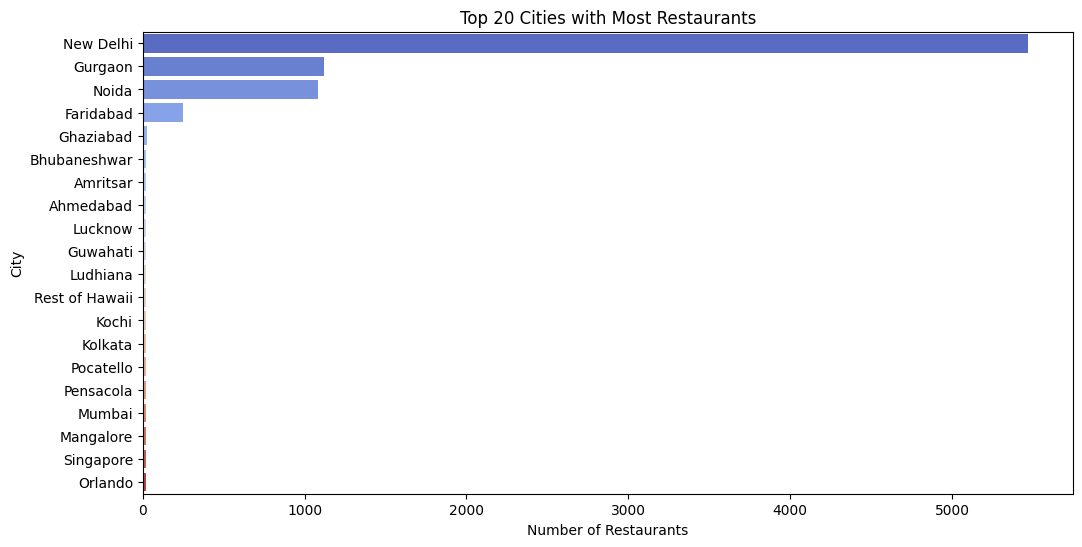

C:\Users\habee\AppData\Local\Temp\ipykernel_14000\2691157056.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_ratings.values, y=city_ratings.index, palette="viridis")


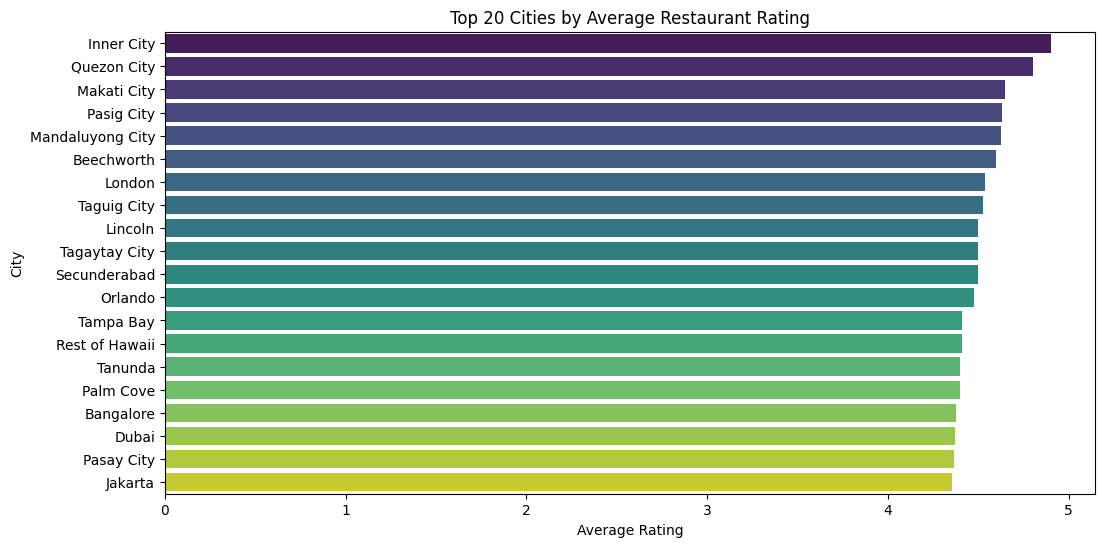

C:\Users\habee\AppData\Local\Temp\ipykernel_14000\2691157056.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_prices.values, y=city_prices.index, palette="magma")


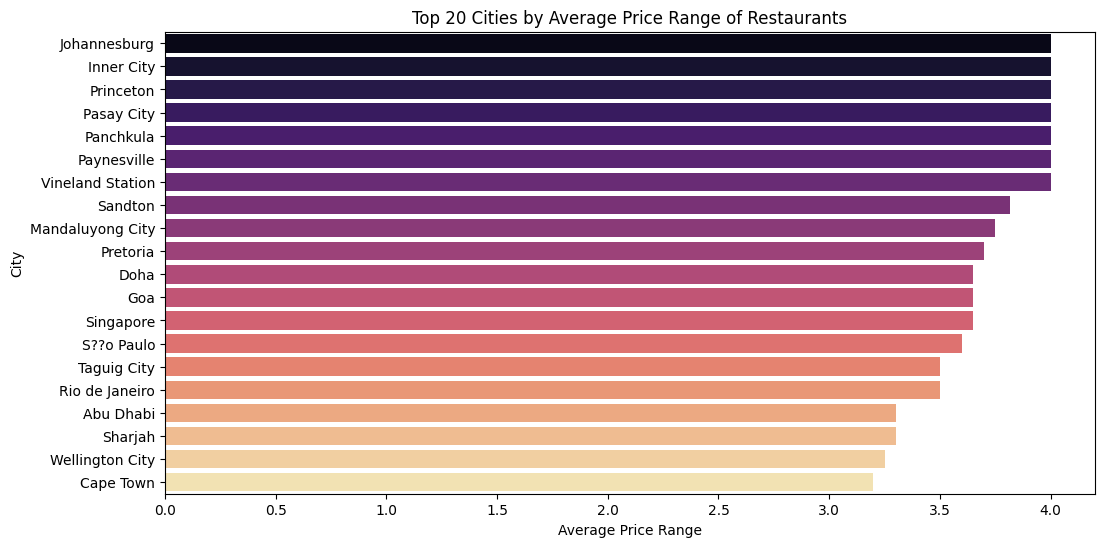


Top Cuisines by City:
            City                              Most Popular Cuisine
0      ??stanbul                                              Cafe
1      Abu Dhabi                                          American
2           Agra                             North Indian, Mughlai
3      Ahmedabad  Cafe, American, Continental, Armenian, Fast Food
4         Albany                            Japanese, Steak, Sushi
5      Allahabad                             North Indian, Chinese
6       Amritsar                                      North Indian
7         Ankara                              Kebab, Turkish Pizza
8       Armidale                                   Bar Food, Steak
9         Athens                          American, Italian, Pizza
10      Auckland                                              Cafe
11       Augusta                                           Mexican
12    Aurangabad                                      North Indian
13      Balingup                       

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim


data = pd.read_csv("C:/Users/habee/OneDrive/Desktop/Dataset .csv")


print(data.head())


print(data[['City', 'Latitude', 'Longitude']].isnull().sum())


data = data.dropna(subset=['Latitude', 'Longitude'])


m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=5)


for _, row in data.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], 
                  popup=f"{row['Restaurant Name']} - {row['Aggregate rating']}⭐",
                  icon=folium.Icon(color="blue", icon="cutlery", prefix="fa")).add_to(m)


m.save("restaurant_locations.html")

print("Map saved as 'restaurant_locations.html' – Open in a browser to view.")


heatmap_data = data[['Latitude', 'Longitude']].values.tolist()
heatmap_map = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=5)
HeatMap(heatmap_data).add_to(heatmap_map)


heatmap_map.save("restaurant_heatmap.html")

print("Heatmap saved as 'restaurant_heatmap.html' – Open in a browser to view.")


city_counts = data['City'].value_counts().head(20)  # Top 20 cities


plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.values, y=city_counts.index, palette="coolwarm")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.title("Top 20 Cities with Most Restaurants")
plt.show()


city_ratings = data.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=city_ratings.values, y=city_ratings.index, palette="viridis")
plt.xlabel("Average Rating")
plt.ylabel("City")
plt.title("Top 20 Cities by Average Restaurant Rating")
plt.show()


city_prices = data.groupby('City')['Price range'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=city_prices.values, y=city_prices.index, palette="magma")
plt.xlabel("Average Price Range")
plt.ylabel("City")
plt.title("Top 20 Cities by Average Price Range of Restaurants")
plt.show()


city_cuisine_counts = data.groupby('City')['Cuisines'].apply(lambda x: x.mode()[0] if not x.mode().empty else "Unknown")


city_cuisine_counts = city_cuisine_counts.reset_index()
city_cuisine_counts.columns = ['City', 'Most Popular Cuisine']

print("\nTop Cuisines by City:")
print(city_cuisine_counts.head(20))


city_cuisine_counts.to_csv("popular_cuisines_by_city.csv", index=False)

print("Popular cuisines by city saved as 'popular_cuisines_by_city.csv'.")


In [2]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.
